# Star Wars Survey
The goal of this project is to illustrate the process of cleaning up and analysing a dataset of survey responses. In particular, the survey focuses on the Star Wars franchise and polls the respondents' opinion on movies and characters of the franchise.

## Data read-in and visualisation

In [249]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
# Import data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [251]:
# Visualise DataFrame shape, column type, number of non-null items
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [252]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Data clean-up
The dataset contains a lot of null values on all its columns. For starters, it'd be good to remove rows which have no ID for the respondent.

In [253]:
col_details = star_wars.iloc[0,:]
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

Furthermore, the goal of the survey and by extension of this data analysis is to investigate the respondents' opinion on movies and characters of the franchise. Respondents who haven't seen any of the movies defeat the purpose of the survey, and their rows should be removed.

In [254]:
star_wars = star_wars[star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=="Yes"]

Finally, it would be interesting to investigate how opinions on the movies change depending on whether the respondents consider themselves fans of the franchise or not. Null rows for the corresponding column should be removed.

In [255]:
star_wars = star_wars[pd.notnull(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"])]

The second and third columns represent binary Yes/No questions. These may be more easily handled as boolean True/False values, since booleans can be selected without using a string comparison.

In [256]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars.iloc[:,1] = star_wars.iloc[:,1].map(yes_no)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(yes_no)

In [257]:
# Check the mapping was done correctly
star_wars.iloc[:,1].value_counts(dropna=False)

True    836
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [258]:
# Check the mapping was done correctly
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Columns 4 through 9 are "Have you seen?" questions for Episodes 1 to 6. They either contain the name of the movie or a null value. Null values in this columns mean that the respondent either didn't answer or didn't see the movie. The choice here is to assume the latter - NaN values will be converted to the boolean False.

The column names are also either cryptic or long-winded, and should be changed.

In [259]:
# Rename "Have you seen" columns to intuitive names.
col_rename = {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"Ep1_Seen",
    "Unnamed: 4":"Ep2_Seen",
    "Unnamed: 5":"Ep3_Seen",
    "Unnamed: 6":"Ep4_Seen",
    "Unnamed: 7":"Ep5_Seen",
    "Unnamed: 8":"Ep6_Seen"
}
star_wars = star_wars.rename(columns=col_rename)

In [260]:
def bool_me(x):
    if pd.isnull(x):
        return False
    else:
        return True
# Convert "Have you seen" answers to boolean.
for c in star_wars.columns[3:9]:
    star_wars[c]=star_wars[c].apply(bool_me)

In [261]:
# Check the mapping was done correctly
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Ep1_Seen,Ep2_Seen,Ep3_Seen,Ep4_Seen,Ep5_Seen,Ep6_Seen,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


Columns 10 through 15 are "Rank the movie" questions. They contain either null values or ranking numbers in a string format - the latter should be converted to floats.

As before, the column names are also either cryptic or long-winded, and should be changed.

In [262]:
# Rename "Rank the movie" columns to intuitive names.
col_rename = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"Rank_Ep1",
    "Unnamed: 10":"Rank_Ep2",
    "Unnamed: 11":"Rank_Ep3",
    "Unnamed: 12":"Rank_Ep4",
    "Unnamed: 13":"Rank_Ep5",
    "Unnamed: 14":"Rank_Ep6"
}
star_wars = star_wars.rename(columns=col_rename)

In [263]:
# Convert "Rank the movie" values to float.
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Data analysis
### Which movie was the most liked?
Now that the movie rankings are numeric it is easy to find out which movies are the most and least liked among the respondents.

In [264]:
means = star_wars.iloc[:,9:15].mean().to_frame()
means.reset_index(inplace=True)

In [265]:
print(means)

      index         0
0  Rank_Ep1  3.732934
1  Rank_Ep2  4.087321
2  Rank_Ep3  4.341317
3  Rank_Ep4  3.272727
4  Rank_Ep5  2.513158
5  Rank_Ep6  3.047847


In [266]:
means = means.rename(index=str,columns={"index":"labels",0:"mean"})
print(means)

     labels      mean
0  Rank_Ep1  3.732934
1  Rank_Ep2  4.087321
2  Rank_Ep3  4.341317
3  Rank_Ep4  3.272727
4  Rank_Ep5  2.513158
5  Rank_Ep6  3.047847


In [267]:
means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,means.shape[0])]
ord_means = means.sort_values("mean", ascending=False)
tickpos = np.arange(6)
barpos = tickpos-0.25

Text(0,0.5,'Movie')

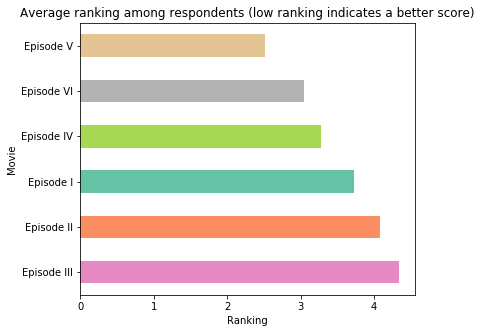

In [268]:
fig, axes = plt.subplots(figsize=(6,5))
ord_means.plot.barh(x="labels",y="mean",ax=axes,legend=False,color=ord_means["colours"])
axes.set_title("Average ranking among respondents (low ranking indicates a better score)")
axes.set_xlabel("Ranking")
axes.set_ylabel("Movie")

#### Results
It can be noted that:
- The best ranking movie on average is Episode V (The Empire Strike Back), which is the notorious consensus among Star Wars fans, so notorious in fact that it is possible that such consensus perpetuates itself in such polls as some sort of tradition or accepted fact. On the other hand critical consensus often agrees that Episode V is indeed the best among all Star Wars movies, and may as such simply be objectively better.
- The worst ranking movie on average is Episode III (Revenge of the Sith), which is interesting given that critical reception largely considers Episode III as the best among the prequels. It may be that since the prequels are often reviled among Star Wars fans (often in the same traditionalistic vein as that which hails Episode V as the unquestionable best) the first sequel ranks better as it had the impact of novelty, while the others are simply dismissed without much further thought.

### What fraction of the respondents saw each of the movies?
Having converted the "Have you seen?" column into boolean values earlier on, it is now easy to calculate what fraction of the respondents saw each of the movies.

In [269]:
sums = star_wars.iloc[:,3:9].sum().divide(star_wars.shape[0]).to_frame()
sums.reset_index(inplace=True)
sums = sums.rename(index=str,columns={"index":"labels",0:"sum"})

In [270]:
sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,means.shape[0])]
ord_sums = sums.sort_values("sum", ascending=True)
tickpos = np.arange(6)
barpos = tickpos-0.25

(0, 1)

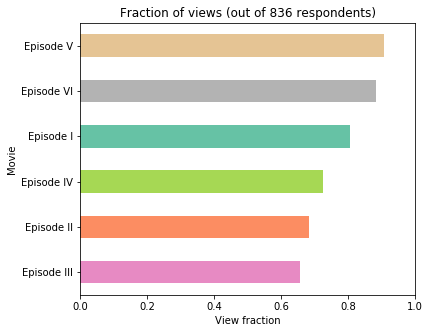

In [271]:
fig, axes = plt.subplots(figsize=(6,5))
ord_sums.plot.barh(x="labels",y="sum",ax=axes,legend=False,color=ord_sums["colours"])
axes.set_title("Fraction of views (out of 836 respondents)")
axes.set_xlabel("View fraction")
axes.set_ylabel("Movie")
axes.set_xlim(0,1)

Is there any correlation between the average ranking of each movie and the fraction of the respondents that actually did see it?

Text(0,0.5,'View fraction')

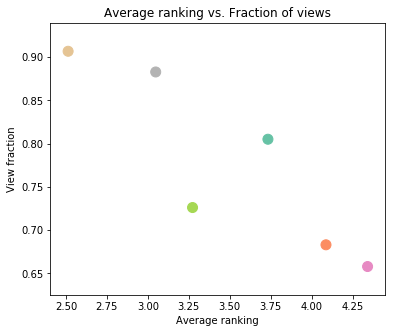

In [272]:
fig, axes = plt.subplots(figsize=(6,5))
plt.scatter(means["mean"],sums["sum"],100,color=means["colours"])
axes.set_title("Average ranking vs. Fraction of views")
axes.set_xlabel("Average ranking")
axes.set_ylabel("View fraction")

In [273]:
corrme = means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.878126
sum,-0.878126,1.000000


#### Results
It can be noted that:
- Just as Episodes V and VI were the most liked, they are also the most viewed. Conversely, just as Episodes II and III were the least liked, they are also the least viewed. Episode IV is an outlier, as it is the third most liked Episode but has been seen by less viwers than Episode I has been.
- As a result, the average ranking scores of the Star Wars movies have a very strong negative correlation with the fraction of viewers for each of them. 
- It should also be noted that most of the respondents have ranked all six movies even while declaring that they haven't seen all of them: there is thus the chance that the Star Wars movies were at least in part ranked out of popular consensus and hearsay rather than out of genuine personal opinion.

## Survey population analysis 
### By gender
The previous sections analysed how well each of the movies was liked and by how many each of the movies was actually seen, but more complex can be asked. First of all, do these results change when the population is split by gender?

In [274]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
na = star_wars[pd.isnull(star_wars["Gender"])]

Text(0,0.5,'Fraction of population')

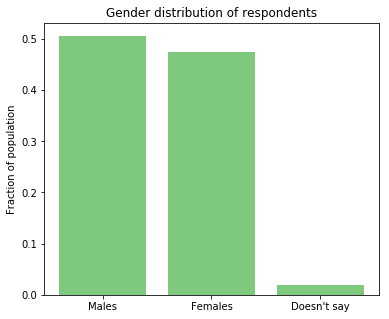

In [275]:
fig, axes = plt.subplots(figsize=(6,5))
plt.bar(x=[.5,1.5,2.5],height=[males.shape[0]/star_wars.shape[0],females.shape[0]/star_wars.shape[0],na.shape[0]/star_wars.shape[0]],color=plt.cm.Accent(0),tick_label=["Males","Females","Doesn't say"])
axes.set_title("Gender distribution of respondents")
axes.set_ylabel("Fraction of population")

In [276]:
m_means = males.iloc[:,9:15].mean().to_frame()
m_means.reset_index(inplace=True)
m_means = m_means.rename(index=str,columns={"index":"labels",0:"mean"})
m_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
m_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,m_means.shape[0])]
ord_m_means = m_means.sort_values("mean", ascending=False)
f_means = females.iloc[:,9:15].mean().to_frame()
f_means.reset_index(inplace=True)
f_means = f_means.rename(index=str,columns={"index":"labels",0:"mean"})
f_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
f_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,f_means.shape[0])]
ord_f_means = f_means.sort_values("mean", ascending=False)
tickpos = np.arange(6)
barpos = tickpos-0.25

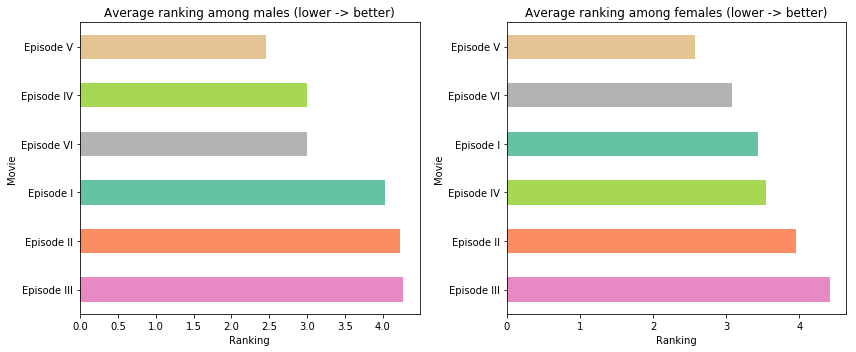

In [277]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_m_means.plot.barh(x="labels",y="mean",ax=axes[0],legend=False,color=ord_m_means["colours"])
axes[0].set_title("Average ranking among males (lower -> better)")
axes[0].set_xlabel("Ranking")
axes[0].set_ylabel("Movie")
ord_f_means.plot.barh(x="labels",y="mean",ax=axes[1],legend=False,color=ord_f_means["colours"])
axes[1].set_title("Average ranking among females (lower -> better)")
axes[1].set_xlabel("Ranking")
axes[1].set_ylabel("Movie")
plt.tight_layout()

In [278]:
m_sums = males.iloc[:,3:9].sum().divide(males.shape[0]).to_frame()
m_sums.reset_index(inplace=True)
m_sums = m_sums.rename(index=str,columns={"index":"labels",0:"sum"})
m_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
m_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,m_sums.shape[0])]
ord_m_sums = m_sums.sort_values("sum", ascending=True)
f_sums = females.iloc[:,3:9].sum().divide(females.shape[0]).to_frame()
f_sums.reset_index(inplace=True)
f_sums = f_sums.rename(index=str,columns={"index":"labels",0:"sum"})
f_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
f_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,f_sums.shape[0])]
ord_f_sums = f_sums.sort_values("sum", ascending=True)
tickpos = np.arange(6)
barpos = tickpos-0.25

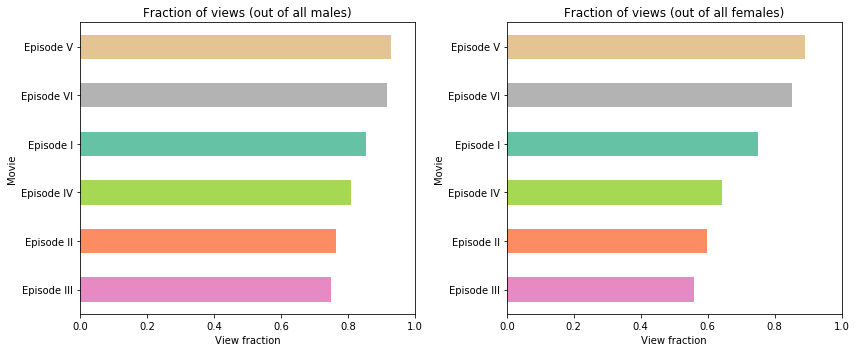

In [279]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_m_sums.plot.barh(x="labels",y="sum",ax=axes[0],legend=False,color=ord_m_sums["colours"])
axes[0].set_title("Fraction of views (out of all males)")
axes[0].set_xlabel("View fraction")
axes[0].set_ylabel("Movie")
axes[0].set_xlim(0,1)
ord_f_sums.plot.barh(x="labels",y="sum",ax=axes[1],legend=False,color=ord_f_sums["colours"])
axes[1].set_title("Fraction of views (out of all females)")
axes[1].set_xlabel("View fraction")
axes[1].set_ylabel("Movie")
axes[1].set_xlim(0,1)
plt.tight_layout()

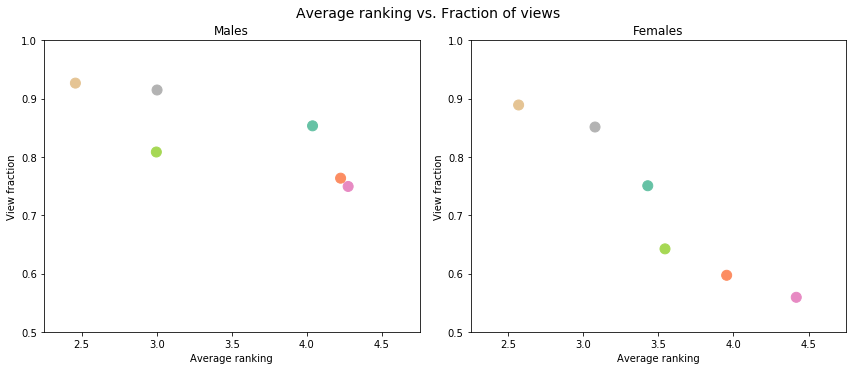

In [280]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(m_means["mean"],m_sums["sum"],100,color=m_means["colours"])
axes[0].set_title("Males")
axes[0].set_xlabel("Average ranking")
axes[0].set_ylabel("View fraction")
axes[0].set_xlim(2.25,4.75)
axes[0].set_ylim(.5,1)
axes[1].scatter(f_means["mean"],f_sums["sum"],100,color=m_means["colours"])
axes[1].set_title("Females")
axes[1].set_xlabel("Average ranking")
axes[1].set_ylabel("View fraction")
axes[1].set_xlim(2.25,4.75)
axes[1].set_ylim(.5,1)
fig.suptitle("Average ranking vs. Fraction of views", fontsize=14, y= 1.02)
plt.tight_layout()

In [281]:
# MALE CORRELATION
corrme = m_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = m_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.790484
sum,-0.790484,1.000000


In [282]:
# FEMALE CORRELATION
corrme = f_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = f_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.951352
sum,-0.951352,1.000000


### By Star Wars fan (y/n)
Secondly, do the results change when the population is split between those that consider themselves fan of the franchise and those that do not?

In [283]:
star_wars_y = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
star_wars_n = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

Text(0,0.5,'Fraction of population')

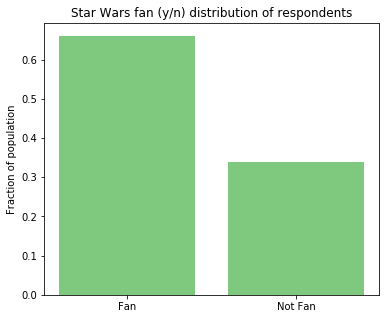

In [284]:
fig, axes = plt.subplots(figsize=(6,5))
plt.bar(x=[.5,1.5],height=[star_wars_y.shape[0]/star_wars.shape[0],star_wars_n.shape[0]/star_wars.shape[0]],color=plt.cm.Accent(0),tick_label=["Fan","Not Fan"])
axes.set_title("Star Wars fan (y/n) distribution of respondents")
axes.set_ylabel("Fraction of population")

In [285]:
swy_means = star_wars_y.iloc[:,9:15].mean().to_frame()
swy_means.reset_index(inplace=True)
swy_means = swy_means.rename(index=str,columns={"index":"labels",0:"mean"})
swy_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
swy_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,swy_means.shape[0])]
ord_swy_means = swy_means.sort_values("mean", ascending=False)
swn_means = star_wars_n.iloc[:,9:15].mean().to_frame()
swn_means.reset_index(inplace=True)
swn_means = swn_means.rename(index=str,columns={"index":"labels",0:"mean"})
swn_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
swn_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,swn_means.shape[0])]
ord_swn_means = swn_means.sort_values("mean", ascending=False)
tickpos = np.arange(6)
barpos = tickpos-0.25

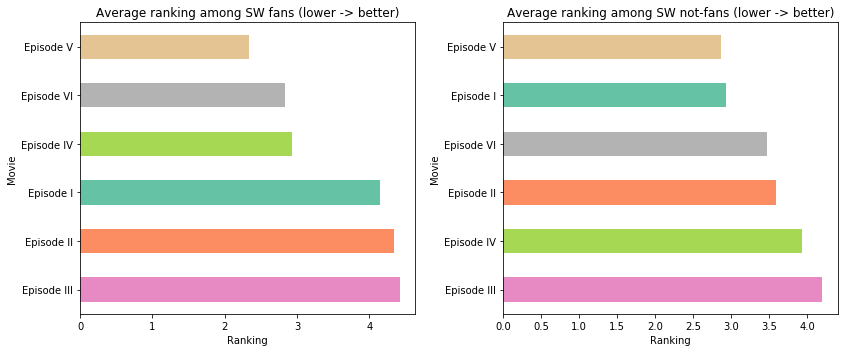

In [286]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_swy_means.plot.barh(x="labels",y="mean",ax=axes[0],legend=False,color=ord_swy_means["colours"])
axes[0].set_title("Average ranking among SW fans (lower -> better)")
axes[0].set_xlabel("Ranking")
axes[0].set_ylabel("Movie")
ord_swn_means.plot.barh(x="labels",y="mean",ax=axes[1],legend=False,color=ord_swn_means["colours"])
axes[1].set_title("Average ranking among SW not-fans (lower -> better)")
axes[1].set_xlabel("Ranking")
axes[1].set_ylabel("Movie")
plt.tight_layout()

In [287]:
swy_sums = star_wars_y.iloc[:,3:9].sum().divide(star_wars_y.shape[0]).to_frame()
swy_sums.reset_index(inplace=True)
swy_sums = swy_sums.rename(index=str,columns={"index":"labels",0:"sum"})
swy_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
swy_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,swy_sums.shape[0])]
ord_swy_sums = swy_sums.sort_values("sum", ascending=True)
swn_sums = star_wars_n.iloc[:,3:9].sum().divide(star_wars_n.shape[0]).to_frame()
swn_sums.reset_index(inplace=True)
swn_sums = swn_sums.rename(index=str,columns={"index":"labels",0:"sum"})
swn_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
swn_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,swn_sums.shape[0])]
ord_swn_sums = swn_sums.sort_values("sum", ascending=True)
tickpos = np.arange(6)
barpos = tickpos-0.25

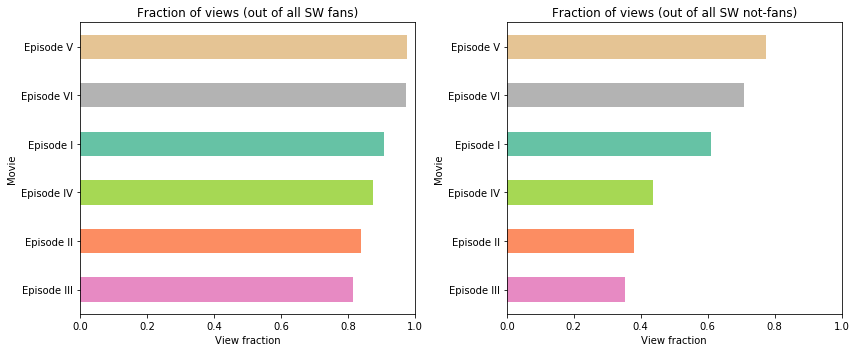

In [288]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_swy_sums.plot.barh(x="labels",y="sum",ax=axes[0],legend=False,color=ord_swy_sums["colours"])
axes[0].set_title("Fraction of views (out of all SW fans)")
axes[0].set_xlabel("View fraction")
axes[0].set_ylabel("Movie")
axes[0].set_xlim(0,1)
ord_swn_sums.plot.barh(x="labels",y="sum",ax=axes[1],legend=False,color=ord_swn_sums["colours"])
axes[1].set_title("Fraction of views (out of all SW not-fans)")
axes[1].set_xlabel("View fraction")
axes[1].set_ylabel("Movie")
axes[1].set_xlim(0,1)
plt.tight_layout()

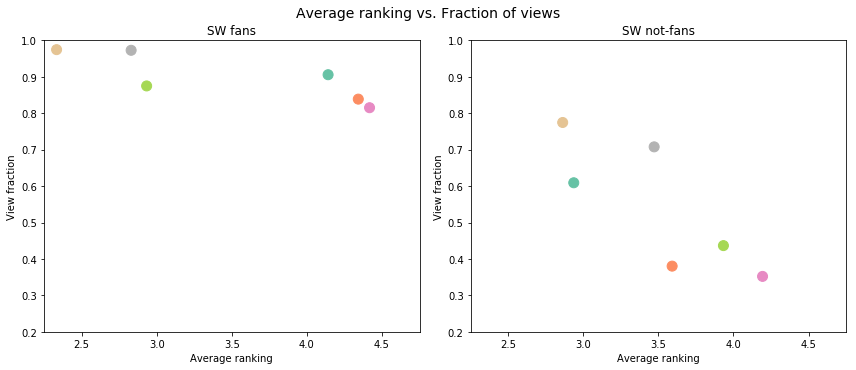

In [289]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(swy_means["mean"],swy_sums["sum"],100,color=swy_means["colours"])
axes[0].set_title("SW fans")
axes[0].set_xlabel("Average ranking")
axes[0].set_ylabel("View fraction")
axes[0].set_xlim(2.25,4.75)
axes[0].set_ylim(.2,1)
axes[1].scatter(swn_means["mean"],swn_sums["sum"],100,color=swn_means["colours"])
axes[1].set_title("SW not-fans")
axes[1].set_xlabel("Average ranking")
axes[1].set_ylabel("View fraction")
axes[1].set_xlim(2.25,4.75)
axes[1].set_ylim(.2,1)
fig.suptitle("Average ranking vs. Fraction of views", fontsize=14, y= 1.02)
plt.tight_layout()

In [290]:
# SW FANS CORRELATION
corrme = swy_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = swy_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.816487
sum,-0.816487,1.000000


In [291]:
# SW NOT-FANS CORRELATION
corrme = swn_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = swn_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.0000,-0.8101
sum,-0.8101,1.0000


### By Star Trek fan (y/n)
Finally, do the results change when the population is split between those that consider themselves fan of the Star Trek franchise and those that do not?

In [292]:
star_trek_y = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
star_trek_n = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
na = star_wars[pd.isnull(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"])]

Text(0,0.5,'Fraction of population')

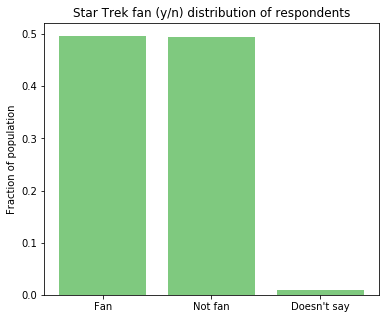

In [293]:
fig, axes = plt.subplots(figsize=(6,5))
plt.bar(x=[.5,1.5,2.5],height=[star_trek_y.shape[0]/star_wars.shape[0],star_trek_n.shape[0]/star_wars.shape[0],na.shape[0]/star_wars.shape[0]],color=plt.cm.Accent(0),tick_label=["Fan","Not fan","Doesn't say"])
axes.set_title("Star Trek fan (y/n) distribution of respondents")
axes.set_ylabel("Fraction of population")

In [294]:
sty_means = star_trek_y.iloc[:,9:15].mean().to_frame()
sty_means.reset_index(inplace=True)
sty_means = sty_means.rename(index=str,columns={"index":"labels",0:"mean"})
sty_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
sty_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,sty_means.shape[0])]
ord_sty_means = sty_means.sort_values("mean", ascending=False)
stn_means = star_trek_n.iloc[:,9:15].mean().to_frame()
stn_means.reset_index(inplace=True)
stn_means = swn_means.rename(index=str,columns={"index":"labels",0:"mean"})
stn_means["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI"]
stn_means["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,swn_means.shape[0])]
ord_stn_means = stn_means.sort_values("mean", ascending=False)
tickpos = np.arange(6)
barpos = tickpos-0.25

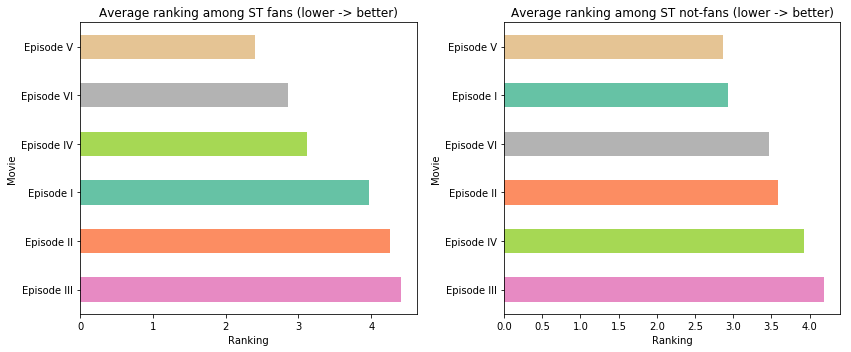

In [295]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_sty_means.plot.barh(x="labels",y="mean",ax=axes[0],legend=False,color=ord_sty_means["colours"])
axes[0].set_title("Average ranking among ST fans (lower -> better)")
axes[0].set_xlabel("Ranking")
axes[0].set_ylabel("Movie")
ord_stn_means.plot.barh(x="labels",y="mean",ax=axes[1],legend=False,color=ord_stn_means["colours"])
axes[1].set_title("Average ranking among ST not-fans (lower -> better)")
axes[1].set_xlabel("Ranking")
axes[1].set_ylabel("Movie")
plt.tight_layout()

In [296]:
sty_sums = star_trek_y.iloc[:,3:9].sum().divide(star_trek_y.shape[0]).to_frame()
sty_sums.reset_index(inplace=True)
sty_sums = sty_sums.rename(index=str,columns={"index":"labels",0:"sum"})
sty_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
sty_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,sty_sums.shape[0])]
ord_sty_sums = sty_sums.sort_values("sum", ascending=True)
stn_sums = star_trek_n.iloc[:,3:9].sum().divide(star_trek_n.shape[0]).to_frame()
stn_sums.reset_index(inplace=True)
stn_sums = stn_sums.rename(index=str,columns={"index":"labels",0:"sum"})
stn_sums["labels"] = ["Episode I","Episode II","Episode III","Episode IV","Episode V","Episode VI",]
stn_sums["colours"] = [plt.cm.Set2(i) for i in np.linspace(0,1,stn_sums.shape[0])]
ord_stn_sums = stn_sums.sort_values("sum", ascending=True)
tickpos = np.arange(6)
barpos = tickpos-0.25

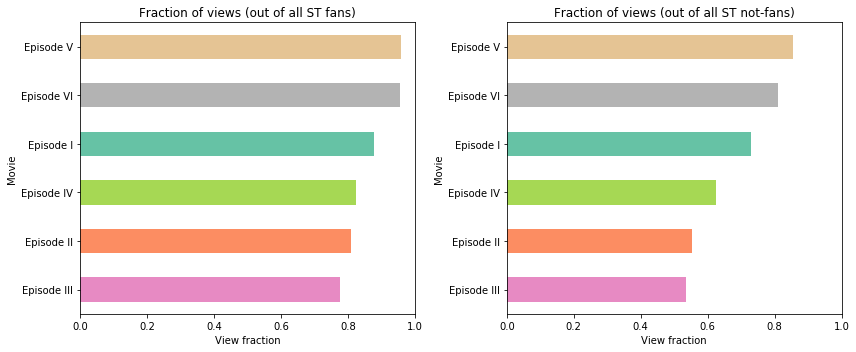

In [297]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
ord_sty_sums.plot.barh(x="labels",y="sum",ax=axes[0],legend=False,color=ord_sty_sums["colours"])
axes[0].set_title("Fraction of views (out of all ST fans)")
axes[0].set_xlabel("View fraction")
axes[0].set_ylabel("Movie")
axes[0].set_xlim(0,1)
ord_stn_sums.plot.barh(x="labels",y="sum",ax=axes[1],legend=False,color=ord_stn_sums["colours"])
axes[1].set_title("Fraction of views (out of all ST not-fans)")
axes[1].set_xlabel("View fraction")
axes[1].set_ylabel("Movie")
axes[1].set_xlim(0,1)
plt.tight_layout()

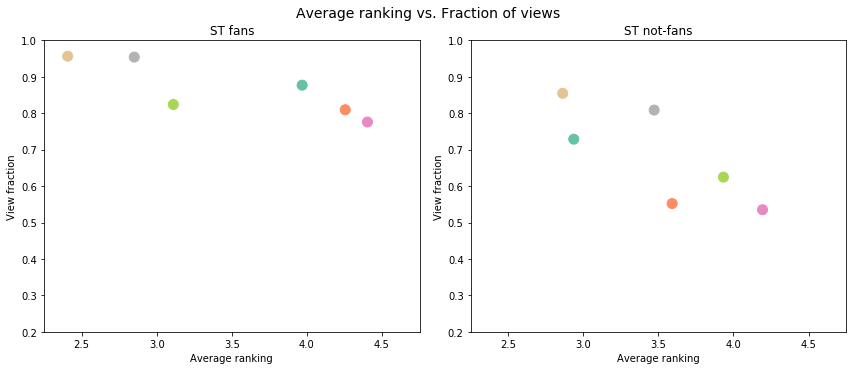

In [298]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].scatter(sty_means["mean"],sty_sums["sum"],100,color=sty_means["colours"])
axes[0].set_title("ST fans")
axes[0].set_xlabel("Average ranking")
axes[0].set_ylabel("View fraction")
axes[0].set_xlim(2.25,4.75)
axes[0].set_ylim(.2,1)
axes[1].scatter(stn_means["mean"],stn_sums["sum"],100,color=stn_means["colours"])
axes[1].set_title("ST not-fans")
axes[1].set_xlabel("Average ranking")
axes[1].set_ylabel("View fraction")
axes[1].set_xlim(2.25,4.75)
axes[1].set_ylim(.2,1)
fig.suptitle("Average ranking vs. Fraction of views", fontsize=14, y= 1.02)
plt.tight_layout()

In [299]:
# ST FANS CORRELATION
corrme = sty_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = sty_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.824923
sum,-0.824923,1.000000


In [300]:
# ST NOT-FANS CORRELATION
corrme = stn_means["mean"].to_frame()
corrme = corrme.iloc[:6]
corrme["sum"] = stn_sums["sum"]
corrme["mean"] = pd.to_numeric(corrme["mean"])
correlations = corrme.corr()
correlations

,mean,sum
mean,1.000000,-0.785296
sum,-0.785296,1.000000


#### Final results
- Viewer fractions were consistent across all groups. In order from most to least viewed: Episode V, Episode VI, Episode I, Episode IV, Episode II, Episode III.
- Male viewers liked Episode I less on average than female viewers. On the other hand, male viewers liked Episode IV more on average than female viewers. Males had higher viewership across all six movies. Correlation between the two parameters was high for both, but especially for females.
- People declaring they are not fans of Star Wars had a more even opinion of the movies, while Star Wars fans consistently ranked the prequels worse than Episodes IV-VI. As expected viewership among fans was very high. Correlation was high in both cases.
- People declaring they are not fans of Star Trek had a more even opinion of the movies too, but less so than Star Wars not-fans. This is likely because the Star Trek not-fans population captures part of the Star Wars fans population. Star Trek fans had an opinion of the movies similar to that of Star Wars fans. Star Trek fans had a high viewership fraction indicating that probably many of them are fans of science fiction in general or are at the very least fans of Star Wars too. High correlation between the parameters was found, especially among fans.

# Addendum A: Who shot first?

How did the respondents answer the fundamental question: who shot first - Han or Greedo?

In [301]:
star_wars["Which character shot first?"].value_counts(dropna=False)

Han                                 325
I don't understand this question    306
Greedo                              197
NaN                                   8
Name: Which character shot first?, dtype: int64

In [302]:
hans = star_wars[star_wars["Which character shot first?"] == "Han"]
greedos = star_wars[star_wars["Which character shot first?"] == "Greedo"]
normies = star_wars[star_wars["Which character shot first?"] == "I don't understand this question"]
na = star_wars[pd.isnull(star_wars["Which character shot first?"])]

Text(0,0.5,'Fraction of population')

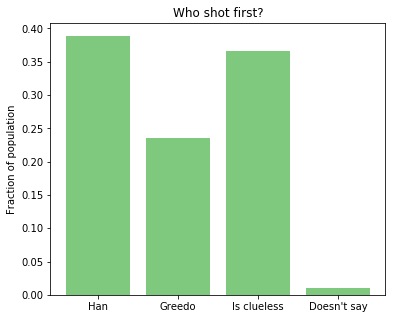

In [303]:
fig, axes = plt.subplots(figsize=(6,5))
plt.bar(x=[.5,1.5,2.5,3.5],height=[hans.shape[0]/star_wars.shape[0],greedos.shape[0]/star_wars.shape[0],normies.shape[0]/star_wars.shape[0],na.shape[0]/star_wars.shape[0]],color=plt.cm.Accent(0),tick_label=["Han","Greedo","Is clueless","Doesn't say"])
axes.set_title("Who shot first?")
axes.set_ylabel("Fraction of population")

### Results
- Among those that answered with a name, most believe that Han shot first (as it should be).
- The number of respondents that do not get the reference is disheartening.

# Addendum B: Character popularity
What are the most and least liked characters in the franchise? Are there any favourites? Let's find out.

In [248]:
# Select character columns
characters = star_wars.iloc[:,15:29]
characters.iloc[:,0].value_counts(dropna=False)

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
NaN                                              7
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [308]:
# Retrieve character names
character_names = [x for x in col_details[15:29]]
print(character_names)

['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']


In [309]:
# Rename character columns to the proper names.
col_rename = {
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo",
    "Unnamed: 16":"Luke Skywalker",
    "Unnamed: 17":"Princess Leia Organa",
    "Unnamed: 18":"Anakin Skywalker",
    "Unnamed: 19":"Obi Wan Kenobi",
    "Unnamed: 20":"Emperor Palpatine",
    "Unnamed: 21":"Darth Vader",
    "Unnamed: 22":"Lando Calrissian",
    "Unnamed: 23":"Boba Fett",
    "Unnamed: 24":"C-3P0",
    "Unnamed: 25":"R2 D2",
    "Unnamed: 26":"Jar Jar Binks",
    "Unnamed: 27":"Padme Amidala",
    "Unnamed: 28":"Yoda",
}
characters = characters.rename(columns=col_rename)

In [311]:
# Convert phrasal rankings into numbers
rank_map = {
    "Very favorably": 1,
    "Somewhat favorably": 2,
    "Neither favorably nor unfavorably (neutral)": 3,
    "Somewhat unfavorably": 4,
    "Very unfavorably": 5,
    "Unfamiliar (N/A)": np.NaN
}
for c in characters.columns:
    characters[c] = characters[c].map(rank_map)

 1.0    610
 2.0    151
 3.0     44
NaN      22
 4.0      8
 5.0      1
Name: Han Solo, dtype: int64

As it was the case for movie rankings, now that the character rankings are numeric it is easy to find out which characters are the most and least liked among the respondents.

In [327]:
c_mean = characters.mean()
c_means = pd.DataFrame()
c_means["mean"] = c_mean
c_means["colours"] = [plt.cm.rainbow(i) for i in np.linspace(0,1,c_means.shape[0])]
c_means = c_means.reset_index()
ord_c_means = c_means.sort_values("mean", ascending=False)
tickpos = np.arange(6)
barpos = tickpos-0.25

Text(0,0.5,'Character')

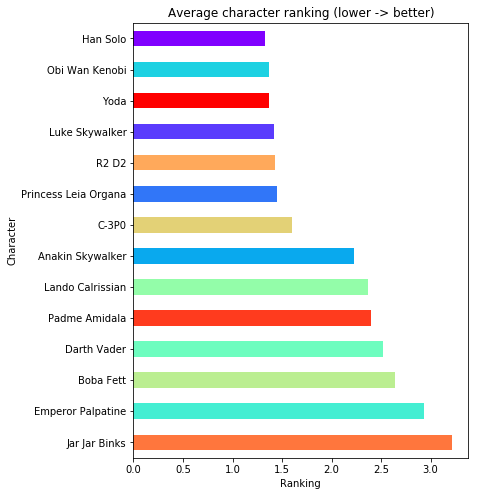

In [328]:
fig, axes = plt.subplots(figsize=(6,8))
ord_c_means.plot.barh(x="index",y="mean",ax=axes,legend=False,color=ord_c_means["colours"])
axes.set_title("Average character ranking (lower -> better)")
axes.set_xlabel("Ranking")
axes.set_ylabel("Character")

### Results
- The character top three is, in order: Han Solo, Obi Wan Kenobi and Yoda.
- "Good" characters from the original trilogy are all seen favourably.
- "Bad" characters from the original trilogy along with all characters from the prequels are seen unfavourably.
- Jar Jar is the least liked of all characters (once again, as it should be).